In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import rfpimp
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns

In [2]:
df = pd.read_csv(Path('Joined_stats.csv'))
df.head()

,playerID,yearID,nameFirst,nameLast,Age,Height_Inches,weight,bats,stint,teamID,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,suareeu01,2019,Eugenio,Suarez,32,71,213,R,1,CIN,...,103,3,2,70,189,4,11,0,6,12
1,perezsa02,2021,Salvador,Perez,33,75,255,R,1,KCA,...,121,1,0,28,170,4,13,0,4,14
2,guerrvl02,2021,Vladimir,Guerrero,24,74,240,R,1,TOR,...,111,4,1,86,110,7,6,0,2,20
3,solerjo01,2019,Jorge,Soler,31,76,235,R,1,KCA,...,117,3,1,73,178,3,10,0,4,16
4,bellico01,2019,Cody,Bellinger,28,76,203,L,1,LAN,...,115,15,5,95,108,21,3,0,4,10


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['bats'] = le.fit_transform(df['bats'])
df.head()

,playerID,yearID,nameFirst,nameLast,Age,Height_Inches,weight,bats,stint,teamID,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,suareeu01,2019,Eugenio,Suarez,32,71,213,2,1,CIN,...,103,3,2,70,189,4,11,0,6,12
1,perezsa02,2021,Salvador,Perez,33,75,255,2,1,KCA,...,121,1,0,28,170,4,13,0,4,14
2,guerrvl02,2021,Vladimir,Guerrero,24,74,240,2,1,TOR,...,111,4,1,86,110,7,6,0,2,20
3,solerjo01,2019,Jorge,Soler,31,76,235,2,1,KCA,...,117,3,1,73,178,3,10,0,4,16
4,bellico01,2019,Cody,Bellinger,28,76,203,1,1,LAN,...,115,15,5,95,108,21,3,0,4,10


In [4]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('HR ~ Age+Height_Inches+weight+bats+H', data=df, return_type='dataframe')

In [5]:
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [6]:
vif

,VIF,variable
0,1296.092238,Intercept
1,1.047901,Age
2,1.433569,Height_Inches
3,1.480508,weight
4,1.022259,bats
5,1.001964,H


In [61]:
features = ["Age", "Height_Inches", "weight", "bats", "H"]
target = ["HR"]

In [62]:
X = df[features].values.reshape(-1, len(features))
y = df[target].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
model = LinearRegression()

In [65]:
# Training the model
lm = model.fit(X_train, y_train)

In [66]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'predictions from the model')

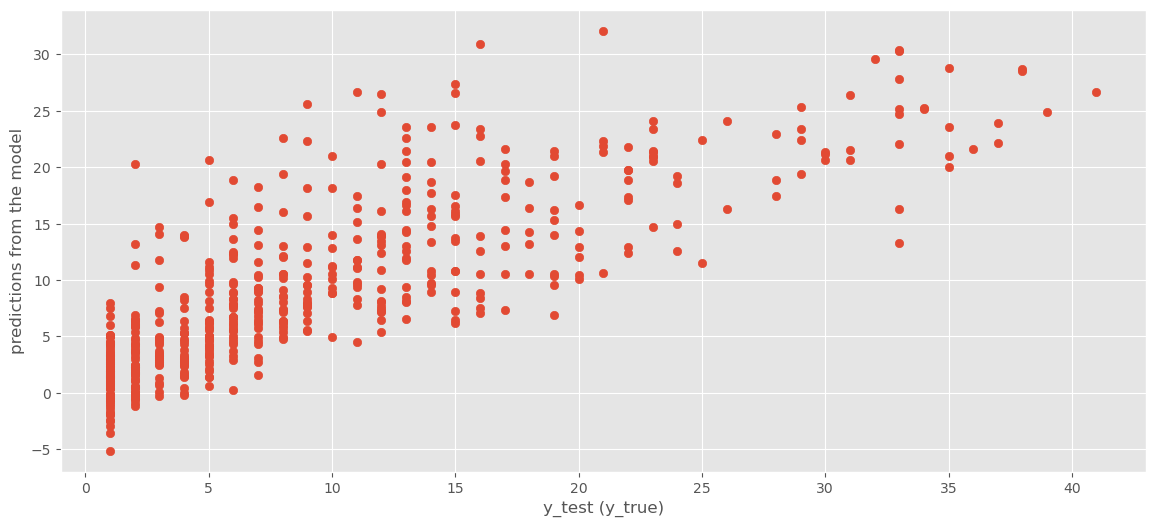

In [79]:
plt.figure(figsize=(14,6))
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('y_test (y_true)')
plt.ylabel('predictions from the model')

In [68]:
# Mean absolute error
mae(y_test, y_pred)

3.6963981786896594

In [69]:
# Print the intercept
print(lm.intercept_)

[-28.78191627]


In [70]:
# Print the coefficients from model
print(lm.coef_)

[[0.0067044  0.16885324 0.0752983  0.26810018 0.15489933]]


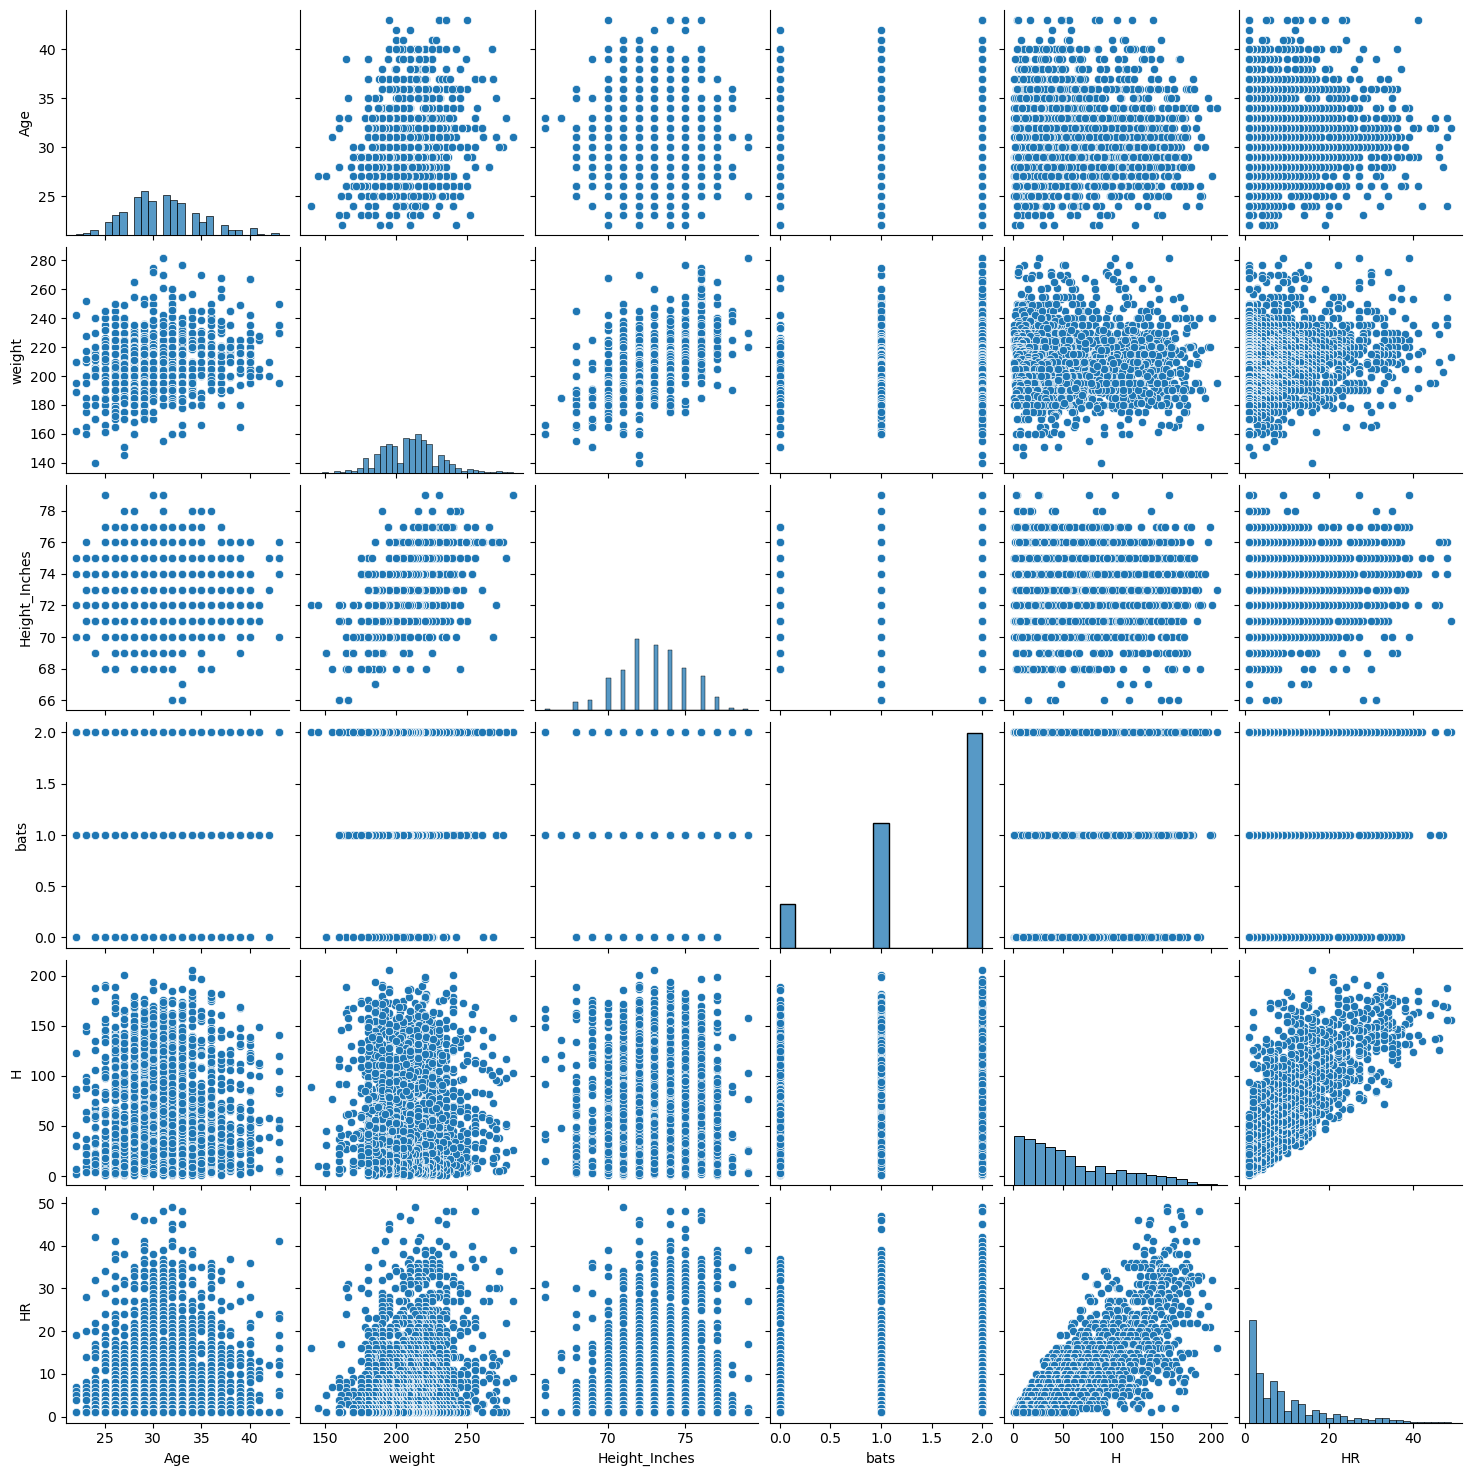

In [71]:
# Getting a pairplot for selected features
sns.pairplot(data=df[['Age', 'weight', 'Height_Inches', 'bats', 'H', 'HR']]);

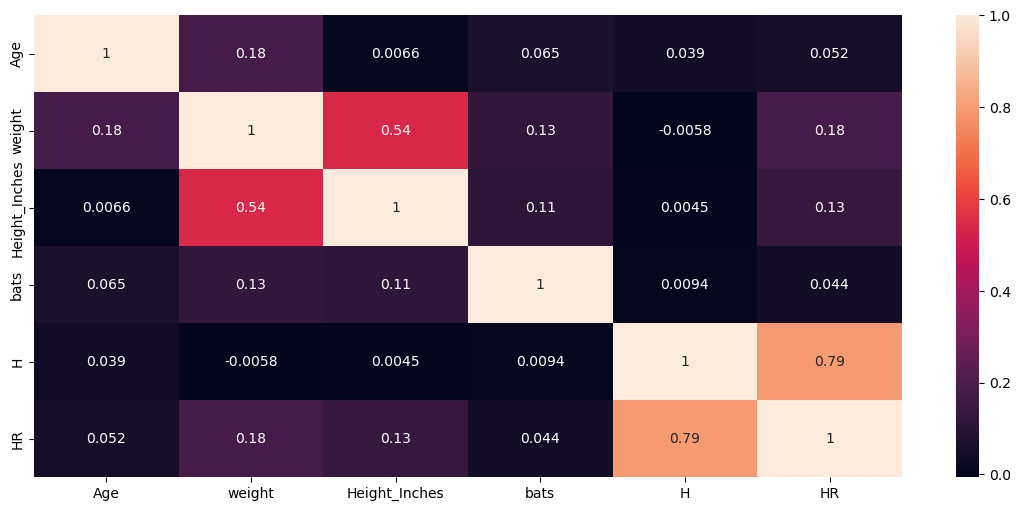

In [72]:
# Heatmap to visualize the correlations btw selected
plt.figure(figsize=(14,6))
pairwise_correlations = df[['Age', 'weight', 'Height_Inches', 'bats', 'H', 'HR']].corr()
sns.heatmap(data=pairwise_correlations, annot=True);

In [73]:
import statsmodels.api as sm

#define response variable
y = df['HR']

#define predictor variables
x = df[['Age', 'Height_Inches', 'weight', 'bats', 'H']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     863.0
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        23:21:38   Log-Likelihood:                -6714.4
No. Observations:                2181   AIC:                         1.344e+04
Df Residuals:                    2175   BIC:                         1.347e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -26.7757      4.058     -6.598